In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import cv2

from google.colab.patches import cv2_imshow

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

In [ ]:
import tensorflow as tf

from keras.models import Sequential

from keras.layers import Dense,MaxPool2D,Flatten,Dropout,Conv2D

from keras.optimizers import Adam

In [ ]:
labels=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/image clss/labels.csv")

print(labels.head())

print(labels.shape)

                                            Filename Labels
0  /content/drive/MyDrive/Colab Notebooks/image c...    eag
1  /content/drive/MyDrive/Colab Notebooks/image c...    eag
2  /content/drive/MyDrive/Colab Notebooks/image c...    eag
3  /content/drive/MyDrive/Colab Notebooks/image c...    eag
4  /content/drive/MyDrive/Colab Notebooks/image c...    eag
(327, 2)


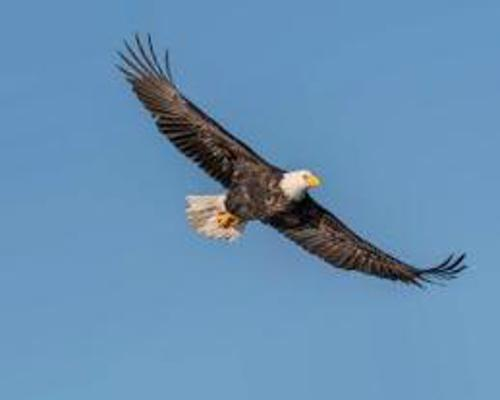

In [ ]:
img=cv2.imread(labels.Filename[1])

cv2_imshow(img)

In [ ]:
img.shape

(400, 500, 3)

In [ ]:
img_size=img.shape

x=[]

y=[]

for img,target in zip(labels.Filename,labels.Labels):
  x.append(cv2.imread(img))
  y.append(target)

In [ ]:
# print(x)

# print(y)

In [ ]:
encoder=LabelEncoder()

y_encoded=encoder.fit_transform(y)
y_encoded

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y_encoded,test_size=0.2,random_state=12)

In [ ]:
x_train=np.array(x_train)/255

x_test=np.array(x_test)/255


#convert to 4D
x_train=x_train.reshape(-1,img_size[0],img_size[1],img_size[2])   # -1 implies x_train size ,i.e space holder
y_train=np.array(y_train)

x_test=x_test.reshape(-1,img_size[0],img_size[1],img_size[2])   # -1 implies x_test size
y_test=np.array(y_test)

In [ ]:
x_train.shape,x_test.shape

((261, 400, 500, 3), (66, 400, 500, 3))

In [ ]:

model=Sequential()
model.add(Conv2D(32,(3,3),padding="same",strides=(2,2),activation="relu",input_shape=(img_size[0],img_size[1],img_size[2])))
model.add(MaxPool2D())

model.add(Conv2D(78,(3,3),activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(78,(3,3),activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(118,activation="relu"))

model.add(Dense(3,activation="softmax"))

In [ ]:
model.compile(loss="SparseCategoricalCrossentropy",
              optimizer=Adam(learning_rate=0.01),
              metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 250, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 125, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 98, 123, 78)       22542     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 49, 61, 78)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 47, 59, 64)        44992     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 29, 64)      

In [ ]:
hist=model.fit(x_train,y_train,epochs=5,batch_size=50,validation_data=(x_test,y_test))

Epoch 1/5
6/6 [==============================] - 14s 571ms/step - loss: 8.0442 - accuracy: 0.3257 - val_loss: 1.0988 - val_accuracy: 0.3030
Epoch 2/5
6/6 [==============================] - 1s 202ms/step - loss: 1.1000 - accuracy: 0.3257 - val_loss: 1.0985 - val_accuracy: 0.3636
Epoch 3/5
6/6 [==============================] - 1s 202ms/step - loss: 1.0997 - accuracy: 0.3218 - val_loss: 1.0977 - val_accuracy: 0.3636
Epoch 4/5
6/6 [==============================] - 1s 199ms/step - loss: 1.0996 - accuracy: 0.3065 - val_loss: 1.0984 - val_accuracy: 0.3333
Epoch 5/5
6/6 [==============================] - 1s 162ms/step - loss: 1.0990 - accuracy: 0.3448 - val_loss: 1.0999 - val_accuracy: 0.3030


In [ ]:
pred=np.argmax(model.predict(x_test[9].reshape(-1,400,500,3)))

pred_name=encoder.inverse_transform([pred])

pred_name

1/1 [==============================] - 0s 21ms/step


array(['par'], dtype='<U3')

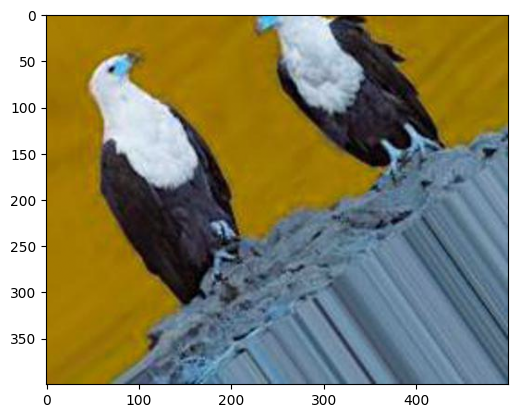

In [ ]:
plt.imshow(x_test[9])